### 교차검증

In [1]:
import pandas as pd

df = pd.read_csv("c:/workspace3/data/iris.csv")
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,Species
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [2]:
X=df[df.columns[0:4]]
y=df['Species']

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [4]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=1)

model.fit(X_train, y_train)

print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

1.0
0.9666666666666667


In [ ]:
# weights :default = 'uniform', 예측에 사용되는 가중치 함수
#     'uniform' : 균일한 가중치, 각 이웃의 모든 포인트는 동일하게 가중치가 부여됨
#     'distance' : 거리의 역수로 가중치 부여, 가까운 이웃에게 더 큰 가중치 부여

# algorithm {'auto', 'ball_tree', 'kd_tree', 'brute'},
#     최근접 이웃을 계산하는 알고리즘
#     'ball_tree': BallTree 알고리즘
#     'kd_tree': KDTree 알고리즘
#     'brute' : 무차별 검색(샘플수가 적을 경우에 설정되는 옵션)
#     'auto' : 최적의 방법으로 자동 설정

# leaf_size, default = 30
#     BallTree 또는 KDTree 알고리즘을 사용하는 경우 전달되는 값

# p (default = 2)
#     p = 1 manhattan_distance
#     p = 2 euclidean_distance

# metrics - p와 같은 값(문자열)
# metric_params : 메트릭 함수에 대한 추가 매개변수
# n_jobs : 이웃 검색을 위해 실행할 병렬 작업 수, -1 : 모든 프로세서 사용

In [5]:
#하이퍼 파라미터 튜닝

from sklearn.model_selection import GridSearchCV

params = {
    'n_neighbors': list(range(1,11)),
#     이웃의 수
    'algorithm': ['ball_tree','kd_tree','brute'],
#     알고리증
    'weights': ['uniform','distance'],
#     가중치
    'p': [1,2]
#   거리계산방식
}

gcv = GridSearchCV(model, params, cv=3)
#                                 교차검증횟수
gcv.fit(X, y)

c:\Python3.9.13\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Python3.9.13\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Python3.9.13\lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
  File "c:\Python3.9.13\lib\site-packages\sklearn\base.py", line 705, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "c:\Python3.9.13\lib\site-packages\sklearn\neighbors\_classification.py", line 246, in predict
    if self._fit_method == "brute" and ArgKminClassMode.is_usable_for(
  File "c:\Python3.9.13\lib\site-packages\sklearn\metrics\_pairwise_distances_reduction\_dispatcher.py", line 471, in is_usable_for
    ArgKmin.is_usable_

GridSearchCV(cv=3, estimator=KNeighborsClassifier(n_neighbors=1),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2], 'weights': ['uniform', 'distance']})

In [6]:
gcv.cv_results_["params"][:5]

[{'algorithm': 'ball_tree', 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'},
 {'algorithm': 'ball_tree', 'n_neighbors': 1, 'p': 1, 'weights': 'distance'},
 {'algorithm': 'ball_tree', 'n_neighbors': 1, 'p': 2, 'weights': 'uniform'},
 {'algorithm': 'ball_tree', 'n_neighbors': 1, 'p': 2, 'weights': 'distance'},
 {'algorithm': 'ball_tree', 'n_neighbors': 2, 'p': 1, 'weights': 'uniform'}]

In [7]:
scores=gcv.cv_results_["mean_test_score"]
scores

array([0.96      , 0.96      , 0.96      , 0.96      , 0.92      ,
       0.96      , 0.94666667, 0.96      , 0.96666667, 0.96666667,
       0.97333333, 0.97333333, 0.96      , 0.96666667, 0.98666667,
       0.97333333, 0.96      , 0.96      , 0.98      , 0.97333333,
       0.95333333, 0.96      , 0.97333333, 0.98666667, 0.96666667,
       0.96      , 0.97333333, 0.98      , 0.96      , 0.96      ,
       0.96666667, 0.98666667, 0.96666667, 0.96      , 0.97333333,
       0.97333333, 0.96666667, 0.96666667, 0.96666667, 0.98666667,
       0.96      , 0.96      , 0.96      , 0.96      , 0.92      ,
       0.96      , 0.94666667, 0.96      , 0.96666667, 0.96666667,
       0.97333333, 0.97333333, 0.96      , 0.96666667, 0.98666667,
       0.97333333, 0.96      , 0.96      , 0.98      , 0.97333333,
       0.95333333, 0.96      , 0.97333333, 0.98666667, 0.96666667,
       0.96      , 0.97333333, 0.98      , 0.96      , 0.96      ,
       0.96666667, 0.98666667, 0.96666667, 0.96      , 0.97333

0.9866666666666667


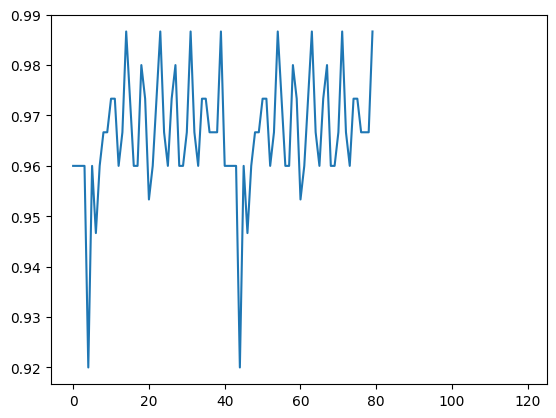

In [8]:
import matplotlib.pyplot as plt

print(max(scores))

plt.plot(scores)

In [9]:
#최고 정확도
print(gcv.best_score_)

#최적의 파라미터
print(gcv.best_params_)

#최적의 모형
print(gcv.best_estimator_)

0.9866666666666667
{'algorithm': 'ball_tree', 'n_neighbors': 4, 'p': 2, 'weights': 'uniform'}
KNeighborsClassifier(algorithm='ball_tree', n_neighbors=4)


In [10]:
#최적의 파라미터를 적용한 모형

from sklearn.model_selection import cross_val_score
import numpy as np

model = KNeighborsClassifier(algorithm='ball_tree', n_neighbors=6, p=2, weights='distance')
#                                                                  직선거리
result=cross_val_score(model, X, y, cv=10)
#                                   교차검증횟수

#교차검증 결과
print(result)

#교차검증 평균값
print(np.mean(result))

#교차검증 최대값
print(np.max(result))

[1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]
0.9666666666666668
1.0
